### Extracting Information from Protein Data Bank (PDB)
Author: Virly Y. Ananda

Description: Structural informatics workflow on obtaining information from PDB. This can be re-adjusted accordingly. Although there might be user friendly ways to obtain these information, understanding the data this way could provide us better workflow on the structure map we'd like to study.

In [6]:
# Install necessary package. This can be tricky because sometimes package installed on Anaconda couldn't connect.
# Instead, we implement !pip install directly on the notebook.
#!pip install biopython
from Bio import PDB

# Extract structures from PDB:
repository = PDB.PDBList()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
repository.retrieve_pdb_file('1OLG', pdir='.', file_format='pdb')
repository.retrieve_pdb_file('1YCQ', pdir='.', file_format='pdb')

# Parse the data to adjust format:
parser = PDB.PDBParser()
p53_1tup = parser.get_structure('P 53 - DNA Binding', 'pdb1tup.ent')
p53_1olg = parser.get_structure('P 53 - Tetramerization', 'pdb1olg.ent')
p53_1ycq = parser.get_structure('P 53 - Transactivation', 'pdb1ycq.ent')


/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: 

In [7]:
# Create a function to adjust the output formating:

def print_pdb_headers(headers, indent=0):
    ind_text = ' ' * indent
    for header, content in headers.items():
        if type(content) == dict:
            print('\n%s%20s:' % (ind_text, header))
            print_pdb_headers(content, indent + 4)
            print()
        elif type(content) == list:
            print('%s%20s:' % (ind_text, header))
            for elem in content:
                print('%s%21s %s' % (ind_text, '->', elem))
        else:
            print('%s%20s: %s' % (ind_text, header, content))

print_pdb_headers(p53_1tup.header)

                name: tumor suppressor p53 complexed with dna
                head: antitumor protein/dna
              idcode: 1TUP
     deposition_date: 1995-07-11
        release_date: 1995-07-11
    structure_method: x-ray diffraction
          resolution: 2.2
 structure_reference:
                   -> n.p.pavletich,k.a.chambers,c.o.pabo the dna-binding domain of p53 contains the four conserved regions and the major mutation hot spots genes dev. v. 7 2556 1993 issn 0890-9369 
                   -> b.vogelstein,k.w.kinzler p53 function and dysfunction cell(cambridge,mass.) v. 70 523 1992 issn 0092-8674 
   journal_reference: y.cho,s.gorina,p.d.jeffrey,n.p.pavletich crystal structure of a p53 tumor suppressor-dna complex: understanding tumorigenic mutations. science v. 265 346 1994 issn 0036-8075 8023157 
              author: Y.Cho,S.Gorina,P.D.Jeffrey,N.P.Pavletich

            compound:

                       1:
                        misc: 
                    molecule: dna (5

In [9]:
# Create a function to implement analysis on the PDB file.
# Here we obtain chain, number of residues, and atoms.

def describe_model(name, pdb):
    print()
    for model in pdb:
        for chain in model:
            print('%s - Chain: %s. Number of residues: %d. Number of atoms: %d.' %
                  (name, chain.id, len(chain), len(list(chain.get_atoms()))))
describe_model('1TUP', p53_1tup)
describe_model('1OLG', p53_1olg)
describe_model('1YCQ', p53_1ycq)


1TUP - Chain: E. Number of residues: 43. Number of atoms: 442.
1TUP - Chain: F. Number of residues: 35. Number of atoms: 449.
1TUP - Chain: A. Number of residues: 395. Number of atoms: 1734.
1TUP - Chain: B. Number of residues: 265. Number of atoms: 1593.
1TUP - Chain: C. Number of residues: 276. Number of atoms: 1610.

1OLG - Chain: A. Number of residues: 42. Number of atoms: 698.
1OLG - Chain: B. Number of residues: 42. Number of atoms: 698.
1OLG - Chain: C. Number of residues: 42. Number of atoms: 698.
1OLG - Chain: D. Number of residues: 42. Number of atoms: 698.

1YCQ - Chain: A. Number of residues: 123. Number of atoms: 741.
1YCQ - Chain: B. Number of residues: 16. Number of atoms: 100.


In [12]:
# Obtain non-standard residues(HETATM): Here we used 1TUP model.

for residue in p53_1tup.get_residues():
    if residue.id[0] in [' ', 'W']:
        continue
    print(residue.id)

('H_ZN', 951, ' ')
('H_ZN', 952, ' ')
('H_ZN', 953, ' ')


Based on the result, we can see in the first column 3 zincs followed by 3 different protein chains on the second column.

In [13]:
# Obtain standard residues based on 1TUP model.
res = next(p53_1tup[0]['A'].get_residues())
print(res)
for atom in res:
    print(atom, atom.serial_number, atom.element)
print(p53_1tup[0]['A'][94]['CA'])

<Residue SER het=  resseq=94 icode= >
<Atom N> 858 N
<Atom CA> 859 C
<Atom C> 860 C
<Atom O> 861 O
<Atom CB> 862 C
<Atom OG> 863 O
<Atom CA>


In [11]:
# Export protein fragment to FASTA file:

from Bio.SeqIO import PdbIO, FastaIO

def get_fasta(pdb_file, fasta_file, transfer_ids=None):
    fasta_writer = FastaIO.FastaWriter(fasta_file)
    fasta_writer.write_header()
    for rec in PdbIO.PdbSeqresIterator(pdb_file):
        if len(rec.seq) == 0:
            continue
        if transfer_ids is not None and rec.id not in transfer_ids:
            continue
        print(rec.id, rec.seq, len(rec.seq))
        fasta_writer.write_record(rec)
        
get_fasta(open('pdb1tup.ent'), open('1tup.fasta', 'w'), transfer_ids=['1TUP:B'])
get_fasta(open('pdb1olg.ent'), open('1olg.fasta', 'w'), transfer_ids=['1OLG:B'])
get_fasta(open('pdb1ycq.ent'), open('1ycq.fasta', 'w'), transfer_ids=['1YCQ:B'])

1TUP:B SSSVPSQKTYQGSYGFRLGFLHSGTAKSVTCTYSPALNKMFCQLAKTCPVQLWVDSTPPPGTRVRAMAIYKQSQHMTEVVRRCPHHERCSDSDGLAPPQHLIRVEGNLRVEYLDDRNTFRHSVVVPYEPPEVGSDCTTIHYNYMCNSSCMGGMNRRPILTIITLEDSSGNLLGRNSFEVRVCACPGRDRRTEEENLRKKGEPHHELPPGSTKRALPNNT 219
1OLG:B KKKPLDGEYFTLQIRGRERFEMFRELNEALELKDAQAGKEPG 42
1YCQ:B PLSQETFSDLWKLLPEN 17


### Extracting More Structural Information Part II
1TUP structure model is used in this section.

In [14]:
# Retrieve 1TUP model:
# Since we have already retrieved it in our previous section, we'll get a warning sign that the model
# has already existed locally.

from Bio import PDB

repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
p53_1tup = parser.get_structure('P 53', 'pdb1tup.ent')

Structure exists: './pdb1tup.ent' 


/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: 

In [16]:
# Extract atom-related statistics:

# Import necessary package
from collections import defaultdict

# Define variables we want to get information on:
atom_cnt = defaultdict(int)
atom_chain = defaultdict(int)
atom_res_types = defaultdict(int)
for atom in p53_1tup.get_atoms():
    my_residue = atom.parent
    my_chain = my_residue.parent
    atom_chain[my_chain.id] += 1
    if my_residue.resname != 'HOH':
        atom_cnt[atom.element] += 1
    atom_res_types[my_residue.resname] += 1
print(dict(atom_res_types))
print(dict(atom_chain))
print(dict(atom_cnt))

{'DT': 257, 'DC': 152, 'DA': 270, 'DG': 176, 'HOH': 384, 'SER': 323, 'VAL': 315, 'PRO': 294, 'GLN': 189, 'LYS': 135, 'THR': 294, 'TYR': 288, 'GLY': 156, 'PHE': 165, 'ARG': 561, 'LEU': 336, 'HIS': 210, 'ALA': 105, 'CYS': 180, 'ASN': 216, 'MET': 144, 'TRP': 42, 'ASP': 192, 'ILE': 144, 'GLU': 297, 'ZN': 3}
{'E': 442, 'F': 449, 'A': 1734, 'B': 1593, 'C': 1610}
{'O': 1114, 'C': 3238, 'N': 1001, 'P': 40, 'S': 48, 'ZN': 3}


In [17]:
# Count the instance per residue and the number of residues per chain:

res_types = defaultdict(int)
res_per_chain = defaultdict(int)

# Create a for loop
for residue in p53_1tup.get_residues():
    res_types[residue.resname] += 1
    res_per_chain[residue.parent.id] += 1

print(dict(res_types))
print(dict(res_per_chain))

{'DT': 13, 'DC': 8, 'DA': 13, 'DG': 8, 'HOH': 384, 'SER': 54, 'VAL': 45, 'PRO': 42, 'GLN': 21, 'LYS': 15, 'THR': 42, 'TYR': 24, 'GLY': 39, 'PHE': 15, 'ARG': 51, 'LEU': 42, 'HIS': 21, 'ALA': 21, 'CYS': 30, 'ASN': 27, 'MET': 18, 'TRP': 3, 'ASP': 24, 'ILE': 18, 'GLU': 33, 'ZN': 3}
{'E': 43, 'F': 35, 'A': 395, 'B': 265, 'C': 276}


In [18]:
# Obtain the bounds of a set of atoms:
import sys

# Create a function
def get_bounds(my_atoms):
    my_min = [sys.maxsize] * 3
    my_max = [-sys.maxsize] * 3
    for atom in my_atoms:
        for i, coord in enumerate(atom.coord):
            if coord < my_min[i]:
                my_min[i] = coord
            if coord > my_max[i]:
                my_max[i] = coord
    return my_min, my_max

chain_bounds = {}
for chain in p53_1tup.get_chains():
    print(chain.id, get_bounds(chain.get_atoms()))
    chain_bounds[chain.id] = get_bounds(chain.get_atoms())

print(get_bounds(p53_1tup.get_atoms()))

E ([22.989, 6.224, 68.526], [83.134, 52.07, 93.047])
F ([18.075, 17.921, 67.133], [81.553, 51.854, 92.927])
A ([47.913, 3.146, 35.011], [101.837, 52.296, 81.497])
B ([46.526, -9.607, 61.584], [94.363, 37.123, 108.068])
C ([14.611, -26.648, 60.367], [62.142, 18.871, 110.81])
([14.611, -26.648, 35.011], [101.837, 52.296, 110.81])


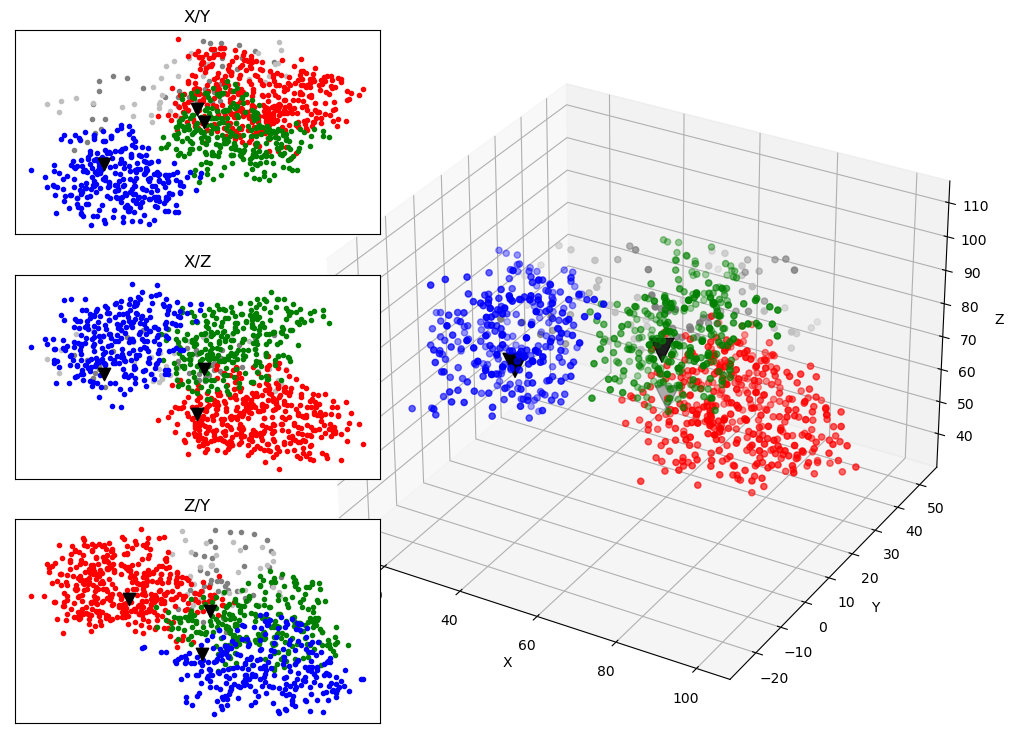

In [21]:
# Visualize model based on the set of atoms

# Import necessary package
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Adjust figures
fig = plt.figure(figsize=(16, 9))
ax3d = fig.add_subplot(111, projection='3d')
ax_xy = fig.add_subplot(331)
ax_xy.set_title('X/Y')
ax_xz = fig.add_subplot(334)
ax_xz.set_title('X/Z')
ax_zy = fig.add_subplot(337)
ax_zy.set_title('Z/Y')
color = {'A': 'r', 'B': 'g', 'C': 'b', 'E': '0.5', 'F': '0.75'}
zx, zy, zz = [], [], []
for chain in p53_1tup.get_chains():
    xs, ys, zs = [], [], []
    for residue in chain.get_residues():
        ref_atom = next(residue.get_iterator())
        x, y, z = ref_atom.coord
        if ref_atom.element == 'ZN':
            zx.append(x)
            zy.append(y)
            zz.append(z)
            continue
        xs.append(x)
        ys.append(y)
        zs.append(z)
    ax3d.scatter(xs, ys, zs, color=color[chain.id])
    ax_xy.scatter(xs, ys, marker='.', color=color[chain.id])
    ax_xz.scatter(xs, zs, marker='.', color=color[chain.id])
    ax_zy.scatter(zs, ys, marker='.', color=color[chain.id])
ax3d.set_xlabel('X')
ax3d.set_ylabel('Y')
ax3d.set_zlabel('Z')
ax3d.scatter(zx, zy, zz, color='k', marker='v', s=300)
ax_xy.scatter(zx, zy, color='k', marker='v', s=80)
ax_xz.scatter(zx, zz, color='k', marker='v', s=80)
ax_zy.scatter(zz, zy, color='k', marker='v', s=80)
for ax in [ax_xy, ax_xz, ax_zy]:
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)

Based on the spatial scatter plot shown above, we see clusters of DNA (in grey) and protein chains in different colors (blue, red and green).

### Computing Molecular Distances on a PDB File

In this section, we will still use a model from 1TUP.

In [22]:
# Load our model: Again, since we already loaded the model previously, we'll just get a warning that our structure
# exists locally.
from Bio import PDB

repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('1TUP', pdir='.', file_format='pdb')
p53_1tup = parser.get_structure('P 53', 'pdb1tup.ent')

Structure exists: './pdb1tup.ent' 


/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 6146.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 6147.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 6148.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain E is discontinuous at line 6149.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain F is discontinuous at line 6171.
  warnings.warn(
/Users/virly/opt/anaconda3/lib/python3.9/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: 

In [24]:
# Obtain zincs: 
zns = []
for atom in p53_1tup.get_atoms():
    if atom.element == 'ZN':
        zns.append(atom)
        for zn in zns:
            print(zn, zn.coord)

<Atom ZN> [58.108 23.242 57.424]
<Atom ZN> [58.108 23.242 57.424]
<Atom ZN> [60.108 17.981 75.931]
<Atom ZN> [58.108 23.242 57.424]
<Atom ZN> [60.108 17.981 75.931]
<Atom ZN> [33.653  0.403 74.115]


Based on the result, we have 6 zinc atoms.

In [25]:
# Define a function to obtain the distance between one atom and a set of other atoms

# Import necessary package
import math

def get_closest_atoms(pdb_struct, ref_atom, distance):
    atoms = {}
    rx, ry, rz = ref_atom.coord
    
    # Obtain coordinates for our reference atom and iterate over our desired comparison list.
    # If an atom is close enough, we can add return list:
    for atom in pdb_struct.get_atoms():
        if atom == ref_atom:
            continue
        x, y, z = atom.coord
        my_dist = math.sqrt((x - rx)**2 + (y - ry)**2 + (z - rz)**2)
        if my_dist < distance:
            atoms[atom] = my_dist
    return atoms

In [27]:
# Compute the atoms near our zincs, the distance of which can be up to 4 A for our model:

for zn in zns:
    print()
    print(zn.coord)
    atoms = get_closest_atoms(p53_1tup, zn, 4)
    
    for atom, distance in atoms.items():
        print(atom.element, distance, atom.coord)


[58.108 23.242 57.424]
C 3.4080117696286854 [57.77  21.214 60.142]
S 2.3262243799594877 [57.065 21.452 58.482]
C 3.4566537492335123 [58.886 20.867 55.036]
C 3.064120559761192 [58.047 22.038 54.607]
N 1.9918273537290707 [57.755 23.073 55.471]
C 2.9243719601324525 [56.993 23.943 54.813]
C 3.857729198122736 [61.148 25.061 55.897]
C 3.62725094648044 [61.61  24.087 57.001]
S 2.2789209624943494 [60.317 23.318 57.979]
C 3.087214470667822 [57.205 25.099 59.719]
S 2.2253158446520818 [56.914 25.054 57.917]

[60.108 17.981 75.931]
C 3.41769274437124 [57.593 15.783 75.207]
S 2.3254721582053093 [58.586 17.082 74.42 ]
C 3.4672070967122894 [62.272 17.174 73.345]
C 3.1139134725185587 [62.061 18.615 73.59 ]
N 2.0564599972249455 [61.366 19.056 74.71 ]
C 2.985233217423681 [61.332 20.382 74.647]
C 3.805126390272999 [62.573 18.263 78.816]
C 3.1803200512467478 [61.521 17.136 78.652]
S 2.2070404885225816 [61.287 16.447 76.993]
C 3.2038921042012745 [57.624 18.417 77.907]
S 2.242320906916762 [58.978 19.402 77

Based on the result shown above, we can see 3 zincs and the information based on the print statements: <br>
1st column: Element name <br>
2nd column: Distance <br>
3rd column: Coordinates in X,Y,Z.

In the next section below, we dive deeper into finding the atoms when we increase the distance measurement.

In [28]:
for distance in [1,2,4,8,16,32,64,128]:
    my_atoms = []
    for zn in zns:
        atoms = get_closest_atoms(p53_1tup, zn, distance)
        my_atoms.append(len(atoms))
    print(distance, my_atoms)

1 [0, 0, 0]
2 [1, 0, 0]
4 [11, 11, 12]
8 [109, 113, 106]
16 [523, 721, 487]
32 [2381, 3493, 2053]
64 [5800, 5827, 5501]
128 [5827, 5827, 5827]


### Visualizing with PyMOL

In [10]:
# Install pymol package: Because Unix is used to perform this analysis, we used pip install.
!pip install ipymol

In [ ]:
#!pip install ipymol